In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Finding the optimal portfolio 

In [2]:
df9=pd.read_csv("ticker.csv")
df9

,MMM
0,AOS
1,ABT
2,ABBV
3,ABMD
4,ACN
...,...
499,YUM
500,ZBRA
501,ZBH
502,ZION


In [3]:
l9=df9['MMM'].values.tolist()
l9

['AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'AAP',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALB',
 'ALK',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'C

In [4]:
df1 = pdr.get_data_yahoo(l9, start='2020-01-01',end='2020-12-31')["Adj Close"]
df1

C:\Users\z7719\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\z7719\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\z7719\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'OGN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,AMD,...,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,BRK.B,BF.B,OGN
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,46.011990,84.297455,80.968918,168.809998,204.304413,57.986031,43.546410,334.429993,156.409714,49.099998,...,100.115349,78.062714,98.588562,259.140015,147.344482,49.903751,132.645020,NaN,NaN,NaN
2020-01-03,45.607437,83.269798,80.200363,166.820007,203.964157,58.005798,43.461418,331.809998,156.419510,48.599998,...,97.810677,78.522194,98.279778,256.049988,146.959335,49.199547,132.664795,NaN,NaN,NaN
2020-01-06,45.896400,83.706055,80.833298,179.039993,202.632248,59.063690,43.121429,333.709991,153.848801,48.389999,...,95.771927,78.013840,98.221886,258.010010,146.110001,48.600010,131.646271,NaN,NaN,NaN
2020-01-07,45.588173,83.240707,80.372162,180.350006,198.257416,59.656895,42.602009,333.390015,152.023834,48.250000,...,97.958405,77.720558,98.395576,256.470001,145.981644,48.305000,132.091232,NaN,NaN,NaN
2020-01-08,45.520748,83.580032,80.941788,178.690002,198.646317,59.202103,42.129807,337.869995,150.277359,47.830002,...,97.682640,77.984505,98.569267,247.639999,147.729614,48.780827,131.804459,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,54.548294,106.700706,98.533798,303.410004,254.158463,90.521706,48.271736,499.859985,158.870193,91.809998,...,141.990005,99.302422,105.767082,376.890015,148.568817,42.802708,159.839264,NaN,NaN,NaN
2020-12-28,54.685944,106.149239,98.715103,312.910004,256.509399,90.989441,48.525597,498.950012,157.011383,91.599998,...,141.520004,99.421288,107.970161,382.589996,148.210449,42.822460,161.500122,NaN,NaN,NaN
2020-12-29,53.791225,106.681015,99.907890,320.929993,254.612854,90.929733,48.281498,502.109985,154.925156,90.620003,...,139.899994,98.569412,107.645592,378.040009,151.754196,42.239773,162.226089,NaN,NaN,NaN


In [5]:
# log return 
df1=df1.dropna(axis='columns')
df2=np.log(df1/df1.shift(1))
df2

Symbols,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,AMD,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.008831,-0.012266,-0.009537,-0.011858,-0.001667,0.000341,-0.001954,-0.007865,0.000063,-0.010236,...,0.000245,-0.014944,0.004798,-0.023289,0.005869,-0.003137,-0.011996,-0.002617,-0.014212,0.000149
2020-01-06,0.006316,0.005225,0.007861,0.070694,-0.006552,0.018073,-0.007854,0.005710,-0.016571,-0.004330,...,0.001223,-0.001981,-0.001437,-0.021064,-0.006495,-0.000589,0.007626,-0.005796,-0.012261,-0.007707
2020-01-07,-0.006738,-0.005575,-0.005721,0.007290,-0.021826,0.009993,-0.012119,-0.000959,-0.011933,-0.002897,...,-0.002055,0.004734,-0.002079,0.022573,-0.003766,0.001767,-0.005987,-0.000879,-0.006089,0.003374
2020-01-08,-0.001480,0.004068,0.007062,-0.009247,0.001960,-0.007653,-0.011146,0.013348,-0.011555,-0.008743,...,0.001126,0.006254,-0.000961,-0.002819,0.003390,0.001764,-0.035036,0.011903,0.009802,-0.002173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.006691,0.008341,-0.000194,-0.002107,-0.000544,0.008280,0.001822,0.005919,0.008688,0.002836,...,0.014217,-0.007924,0.004964,0.000000,0.005201,0.006999,-0.007533,0.003423,-0.003915,0.005428
2020-12-28,0.002520,-0.005182,0.001838,0.030831,0.009207,0.005154,0.005245,-0.001822,-0.011769,-0.002290,...,-0.018440,0.009397,0.010620,-0.003316,0.001196,0.020616,0.015011,-0.002415,0.000461,0.010337
2020-12-29,-0.016496,0.004997,0.012011,0.025307,-0.007421,-0.000656,-0.005043,0.006313,-0.013376,-0.010756,...,-0.000722,-0.010097,0.001530,-0.011513,-0.008605,-0.003011,-0.011964,0.023629,-0.013700,0.004485


In [6]:
a1=np.array([1/499]*499)
a1

array([0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200401,
       0.00200401, 0.00200401, 0.00200401, 0.00200401, 0.00200

In [18]:
def portfolio(a1):
    ret=np.dot(df2.mean(),a1)*250
    std=np.dot(a1.T, np.dot(df2.cov()*250, a1))**0.5
    sharpe=(ret-0.03)/std          
    return ret,std,sharpe

### Optimization algorithm 

In [7]:
def neg_sharpe(weight):
    ret=np.dot(df2.mean(),weight)*250
    std=np.dot(weight.T, np.dot(df2.cov()*250, weight))**0.5
    sharpe=(ret-0.03)/std       
    return -sharpe

In [8]:

def sum_weight(weight):
    return np.sum(weight)-1

In [9]:
 constraint = ({'type':'eq','fun': sum_weight})

In [10]:
a = [(0,1)]
for i in range (2,500):
    a.append((0,1))
bound = tuple(a)  

In [11]:
optimal=minimize(fun=neg_sharpe, x0=a1, method = 'SLSQP', bounds = bound, constraints = constraint)
optimal

     fun: -3.127336989026013
     jac: array([ 4.98219818e-01,  7.92526841e-01,  3.91312242e-01, -6.40838444e-02,
        8.43842208e-01,  2.22447127e-01,  7.89779007e-01,  9.42335278e-01,
        1.13843456e+00,  9.10358995e-01,  9.27755743e-01,  1.77799413e+00,
        6.39208883e-01,  8.10843289e-01,  8.05052727e-01,  1.41149044e-01,
        1.85421380e+00,  8.61424983e-01,  7.23451465e-01,  1.42273220e+00,
        9.80596066e-01,  1.35138485e+00,  7.35773176e-01,  7.33243287e-01,
        1.01666349e+00,  1.91648364e-01,  1.01345748e+00,  9.56726164e-01,
        2.59758949e+00,  9.76282805e-01,  1.47589305e+00,  2.25853074e+00,
        1.24020571e+00,  5.96796781e-01,  1.60119000e+00,  5.33291101e-01,
        1.08039489e+00,  1.19501984e+00,  9.75444406e-01,  1.11373520e+00,
        1.12668625e+00,  1.25751632e+00,  1.16131207e+00,  4.25717226e+00,
        5.70046842e-01,  1.39264381e+00,  1.25165936e+00,  7.01599270e-01,
        5.50157398e-01,  8.96026194e-01,  1.33629969e+00,  1.

In [12]:
a3=optimal["x"]
a3

array([8.22400804e-14, 4.33998271e-14, 9.21210576e-14, 2.02547871e-01,
       3.36878425e-14, 1.15367909e-13, 5.07039452e-14, 6.82438913e-15,
       5.65926022e-15, 0.00000000e+00, 1.53706126e-14, 0.00000000e+00,
       5.57106967e-14, 4.25369022e-14, 4.56867289e-14, 1.01279191e-13,
       0.00000000e+00, 3.39654280e-14, 2.85501307e-14, 0.00000000e+00,
       3.52186673e-14, 0.00000000e+00, 4.41110783e-14, 4.00321343e-14,
       3.12210943e-14, 1.00741997e-13, 1.72384160e-14, 3.47707978e-14,
       0.00000000e+00, 4.05843267e-14, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.89301665e-14, 0.00000000e+00, 8.11600795e-14,
       9.38069833e-16, 5.94137156e-15, 1.44835132e-14, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.67435750e-15, 0.00000000e+00,
       4.44224012e-14, 0.00000000e+00, 0.00000000e+00, 4.58757225e-14,
       6.66248390e-14, 4.39500460e-14, 0.00000000e+00, 1.56436486e-14,
       1.04724487e-14, 4.80897409e-15, 2.31289211e-14, 0.00000000e+00,
      

In [13]:
w3=pd.Series(data=a3,index=df2.columns)
w3

Symbols
AOS     8.224008e-14
ABT     4.339983e-14
ABBV    9.212106e-14
ABMD    2.025479e-01
ACN     3.368784e-14
            ...     
YUM     2.304345e-14
ZBRA    2.622887e-14
ZBH     0.000000e+00
ZION    2.093827e-14
ZTS     3.364809e-14
Length: 499, dtype: float64

In [19]:
# ret, std, and sharpe ratio of the optimal portfolio 
ret3,std3,sharpe3=portfolio(a3)

In [20]:
ret3

1.5201044455060653

In [21]:
std3

0.4764770956039975

In [22]:
sharpe3

3.127336989026013

In [23]:
weight=pd.DataFrame({"optimal":w3})
weight

,optimal
Symbols,
AOS,8.224008e-14
ABT,4.339983e-14
ABBV,9.212106e-14
ABMD,2.025479e-01
ACN,3.368784e-14
...,...
YUM,2.304345e-14
ZBRA,2.622887e-14
ZBH,0.000000e+00


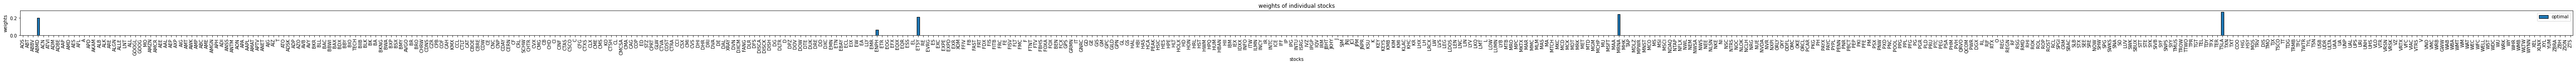

In [24]:
weight.plot(kind="bar",figsize = (100,1), edgecolor='black')
plt.xlabel('stocks')
plt.ylabel('weights')
plt.title('weights of individual stocks');